# Titanic kaggle competition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../data/train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

## Have a quick look at the data

In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.groupby(['Survived', 'Sex']).Survived.count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [9]:
pd.crosstab(df_train.Survived, df_train.Sex, margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [10]:
df_train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
pd.crosstab(df_train.Pclass,df_train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


## Model building

In [ ]:
# Fill columns that missing data with average
def clean_data(df):
    columns = df.columns
    for column in columns:
        df[column].fillna((df[column].mean()), inplace=True)

## Transofrm data to numerical and categorical values

In [12]:
df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
df_train['Embarked'].replace(['S', 'C', 'Q'],[0,1,2],inplace=True)

In [13]:
df_train['Cabin'] = df_train.Cabin.isnull()

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,True,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,True,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,True,0.0


In [15]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin             bool
Embarked       float64
dtype: object

## How to deal with missing data

In [20]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
df_train['Age'].fillna((df_train['Age'].mean()), inplace=True)
df_train['Embarked'].fillna((2), inplace=True)

## What to include in the model

In [21]:
df_train.drop(['PassengerId','Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [22]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,0,22.0,7.2500,True,0.0
1,1,1,1,38.0,71.2833,False,1.0
2,1,3,1,26.0,7.9250,True,0.0
3,1,1,1,35.0,53.1000,False,0.0
4,0,3,0,35.0,8.0500,True,0.0


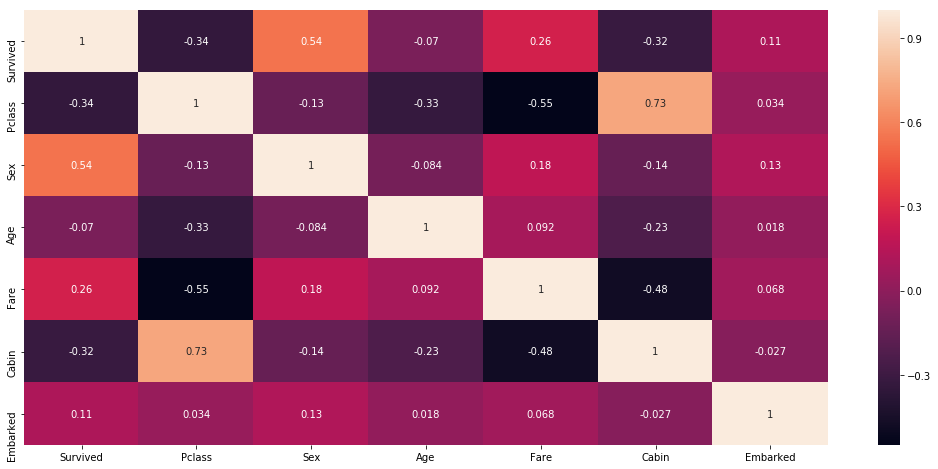

In [23]:
plt.subplots(figsize=(18,8))
sns.heatmap(df_train.corr(),annot=True)

## Modelling

In [25]:
X = df_train.loc[:, df_train.columns != 'Survived']
y = df_train.Survived

In [26]:
from sklearn.model_selection import train_test_split # to split the data
from sklearn import metrics # to evaluate the model accuracy

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [30]:
from sklearn.metrics import accuracy_score

from sklearn import svm #Support Vector Machine
model=svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
prediction1=model.predict(x_test)

model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)
prediction2=model.predict(x_test)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
prediction3=model.predict(x_test)

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
prediction4=model.predict(x_test)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction5=model.predict(x_test)

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
prediction6=model.predict(x_test)

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
prediction7=model.predict(x_test)

from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(x_train,y_train)
prediction8=model.predict(x_test)

from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)
prediction9=model.predict(x_test)

from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
prediction10=model.predict(x_test)

"""
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
prediction11=model.predict(x_test)
"""





/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'\nfrom xgboost import XGBClassifier\nmodel=XGBClassifier()\nmodel.fit(x_train,y_train)\nprediction11=model.predict(x_test)\n'

In [35]:
print(accuracy_score(y_test, prediction1))
print(accuracy_score(y_test, prediction2))
print(accuracy_score(y_test, prediction3))
print(accuracy_score(y_test, prediction4))
print(accuracy_score(y_test, prediction5))
print(accuracy_score(y_test, prediction6))
print(accuracy_score(y_test, prediction7))
print(accuracy_score(y_test, prediction8))
print(accuracy_score(y_test, prediction9))
print(accuracy_score(y_test, prediction10))

0.6902985074626866
0.7873134328358209
0.8059701492537313
0.8097014925373134
0.7947761194029851
0.7126865671641791
0.8022388059701493
0.7723880597014925
0.8171641791044776
0.8432835820895522


## Make prediction for the test file

In [51]:
df_test = pd.read_csv('../data/test.csv')
passengerId = df_test.PassengerId

In [50]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
def prepare_data(df):
    # Turn into numerical values
    df['Sex'].replace(['male','female'],[0,1],inplace=True)
    df['Embarked'].replace(['S', 'C', 'Q'],[0,1,2],inplace=True)
    df['Cabin'] = df.Cabin.isnull()
    # Deal with missing values
    df['Age'].fillna((df_train['Age'].mean()), inplace=True)
    df['Fare'].fillna((df['Fare'].mean()), inplace=True)
    
    return df

In [40]:
df_test = prepare_data(df_test)

In [46]:
df_test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked
0,3,0,34.5,7.8292,True,2
1,3,1,47.0,7.0000,True,0
2,2,0,62.0,9.6875,True,2
3,3,0,27.0,8.6625,True,0
4,3,1,22.0,12.2875,True,0


In [44]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [45]:
df_test.drop(['PassengerId','Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [ ]:
X = df_test.loc[:, df_test.columns != 'Survived']
y = df_test.Survived

In [47]:
prediction10=model.predict(df_test)

In [48]:
df_test

,Pclass,Sex,Age,Fare,Cabin,Embarked
0,3,0,34.500000,7.8292,True,2
1,3,1,47.000000,7.0000,True,0
2,2,0,62.000000,9.6875,True,2
3,3,0,27.000000,8.6625,True,0
4,3,1,22.000000,12.2875,True,0
5,3,0,14.000000,9.2250,True,0
6,3,1,30.000000,7.6292,True,2
7,2,0,26.000000,29.0000,True,0
8,3,1,18.000000,7.2292,True,1
9,3,0,21.000000,24.1500,True,0


In [56]:
gradient_submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': prediction10})

In [53]:
prediction10

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
gradient_submission.to_csv('gradient_submission.csv', index=False)